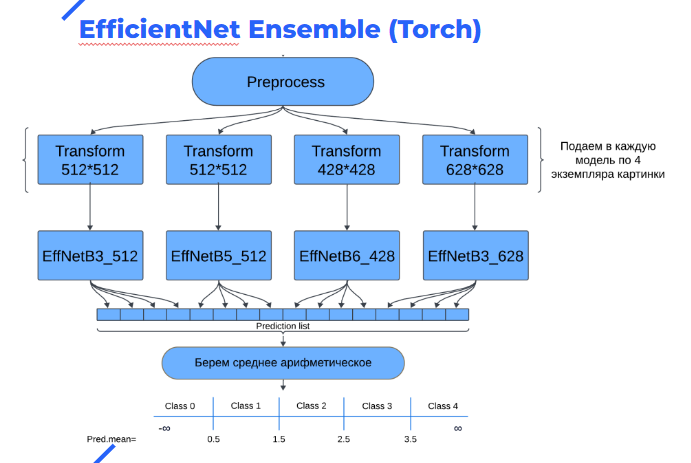

# Определяем основные параметры

In [ ]:
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np
from PIL import Image
from tqdm import tqdm

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 4
NUM_WORKERS = 6
PIN_MEMORY = True
LOAD_MODEL = True
LEARNING_RATE = 3e-5

import os
print("We are currently in the folder of ",os.getcwd())

We are currently in the folder of  /content


# Т.к у нас 4 нейрнных сети EfficienNet нам нужно создать несколько загрузчиков

In [ ]:
test_transforms_512 = A.Compose(
    [
        A.Resize(height=512, width=512),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1), saturation=(0.9, 1.1), hue=(0, 0), p=0.5),
        A.GaussianBlur(blur_limit=(3, 7), sigma_limit=0, always_apply=True, p=1),
        A.Normalize(
            mean=[0.3199, 0.2240, 0.1609],
            std=[0.3020, 0.2183, 0.1741],
            max_pixel_value=255.0,
        ),
        ToTensorV2(),
    ]
)
test_transforms_628 = A.Compose(
    [
        A.Resize(height=628, width=628),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1), saturation=(0.9, 1.1), hue=(0, 0), p=0.5),
        A.GaussianBlur(blur_limit=(3, 7), sigma_limit=0, always_apply=True, p=1),
        A.Normalize(
            mean=[0.3199, 0.2240, 0.1609],
            std=[0.3020, 0.2183, 0.1741],
            max_pixel_value=255.0,
        ),
        ToTensorV2(),
    ]
)
test_transforms_428 = A.Compose(
    [
        A.Resize(height=428, width=428),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1), saturation=(0.9, 1.1), hue=(0, 0), p=0.5),
        A.GaussianBlur(blur_limit=(3, 7), sigma_limit=0, always_apply=True, p=1),
        A.Normalize(
            mean=[0.3199, 0.2240, 0.1609],
            std=[0.3020, 0.2183, 0.1741],
            max_pixel_value=255.0,
        ),
        ToTensorV2(),
    ]
)

In [ ]:
!pip install efficientnet_pytorch

  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 66.7 MB/s eta 0:00:00
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16429 sha256=5a476a5ac0f3760e66fc151d779bf2fa0f1912f5d28fa886a16e72783f92145d
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch


# Загрузка моделей и тесовых картинок. Все добро будет лежать в Models/

In [ ]:
import gdown
url = 'https://drive.google.com/drive/u/0/folders/1--k1r1U-URCMc9BJdFLGJuYK0AuhecX-'
gdown.download_folder(url, quiet=True)
os.chdir('Models')
print("We are currently in the folder of ",os.getcwd())

We are currently in the folder of  /content/Models


In [ ]:
from efficientnet_pytorch import EfficientNet
from torch import nn

EffNetB5_512_model = EfficientNet.from_name('efficientnet-b5')
EffNetB5_512_model._fc = nn.Linear(2048, 1)

EffNetB6_428_model = EfficientNet.from_name('efficientnet-b6')
EffNetB6_428_model._fc = nn.Linear(2304, 1)

EffNetB3_512_model = EfficientNet.from_name('efficientnet-b3')
EffNetB3_512_model._fc = nn.Linear(1536, 1)

EffNetB3_628_model = EfficientNet.from_name('efficientnet-b3')
EffNetB3_628_model._fc = nn.Linear(1536, 1)

EffNetB5_512_model.load_state_dict(torch.load('EffNetB5_512acc78kap78.pth.tar',map_location=torch.device('cpu'))["state_dict"])
EffNetB6_428_model.load_state_dict(torch.load('EffNetB6_428acc77kap76.pth.tar',map_location=torch.device('cpu'))["state_dict"])
EffNetB3_512_model.load_state_dict(torch.load('EffNetB3_512_acc79_kap76.pth.tar',map_location=torch.device('cpu'))["state_dict"])
EffNetB3_628_model.load_state_dict(torch.load('EffNetB3_628_acc79_kap72.pth.tar',map_location=torch.device('cpu'))["state_dict"])
EffNetB5_512_model.eval()
EffNetB6_428_model.eval()
EffNetB3_512_model.eval()
EffNetB3_628_model.eval()
print('Models loaded')

Models loaded


# Функция предикта для картинки, здесь будут учавствовать все 4 модели. Каждая картинка будет 4 раза подаваться в каждую модель, с небольшой аугментацией по яркости,контрасту и повороту. Итого получиться 16 предиктов, мы считаем средний предикт и берем его как выход.

In [ ]:
def predict_img_ensamble(path):
  x = np.array(Image.open(path))
  predict = []

  #512 models
  for i in range(4):
    image = test_transforms_512(image=x)["image"]
    image = image.unsqueeze(0)
    with torch.no_grad():
      pred = EffNetB5_512_model(image)
      predict.append(pred)
      pred = EffNetB3_512_model(image)
      predict.append(pred)

  #428 model
  for i in range(4):
    image = test_transforms_428(image=x)["image"]
    image = image.unsqueeze(0)
    with torch.no_grad():
      pred = EffNetB6_428_model(image)
      predict.append(pred)

  #628 model
  for i in range(4):
    image = test_transforms_628(image=x)["image"]
    image = image.unsqueeze(0)
    with torch.no_grad():
      pred = EffNetB3_628_model(image)
      predict.append(pred)

  predict = np.squeeze(np.array(predict),(-1,-2))

  mean_predict = predict.mean()

  if mean_predict < 0.5: predict = 'You have no DR - label 0'#0
  elif mean_predict >= 0.5 and mean_predict < 1.5: predict = 'You have mild stage DR - label 1'#1
  elif mean_predict >= 1.5 and mean_predict < 2.5: predict = 'You have moderate stage DR - label 2'#2
  elif mean_predict >= 2.5 and mean_predict < 3.5: predict = 'You have severe stage DR - label 3'#3
  elif mean_predict >= 3.5: predict = 'You have Proliferative DR - label 4'#4

  print(predict)
  #return(predict)


# Предикт на данных лежащих в /Models. В названии каждой из 10 картинок есть ее label. Я взял их из тестовой выборки и вручную добавил лейбл в название.

In [ ]:
path = input('Введите имя картинки с расширением (.jpeg)')
predict_img_ensamble(path)

Введите имя картинки с расширением (.jpeg)9951_right_label_3.jpeg
You have severe stage DR - label 3


# Предикт на данных лежащих на вашем ПК

In [ ]:
from google.colab import files

uploaded = files.upload()
name_file = list(uploaded.keys())[0]
predict_img_ensamble(name_file)

Saving 10_left.jpeg to 10_left.jpeg
You have no DR - label 0
